In [1]:
## Standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import json
import torch
import astroddpm
import re
import tqdm.notebook as tqdm

## Relative imports
from astroddpm.runners import Diffuser, config_from_id, get_samples
from astroddpm.analysis.validationMetrics import powerSpectrum, minkowskiFunctional, basics
from astroddpm.analysis import overfitting_check
from astroddpm.utils.plot import check_nearest_epoch, plot_losses, check_training_samples, plot_comparaison
from astroddpm.diffusion.dm import DiscreteSBM
from astroddpm.diffusion.stochastic.sde import DiscreteVPSDE
from astroddpm.diffusion.models.network import ResUNet
import astroddpm.utils.colormap_custom 
from quantimpy import minkowski as mk

## Wasserstein distance
from scipy.stats import wasserstein_distance

In [5]:
save_fig = True

params = {'text.usetex': True,
         'text.latex.preamble': r'\usepackage{amsmath}',
         "font.family": "serif", "font.serif": ["Computer Modern Roman"],
         'font.size': 12,
         'image.interpolation': 'none'}
plt.rcParams.update(params)

In [10]:
wass_dist_multi_data_theta = torch.load('../wass_dist_multi_data_theta.pt')

In [11]:
wass_dist_multi_data_theta.shape

(25, 25, 100)

In [16]:
theta_x_min = 50
theta_x_max = 90
theta_y_min = 7.5e-3
theta_y_max = 56.7e-3

In [24]:
wass_dist_multi_data_theta.max()

0.9149087946861982

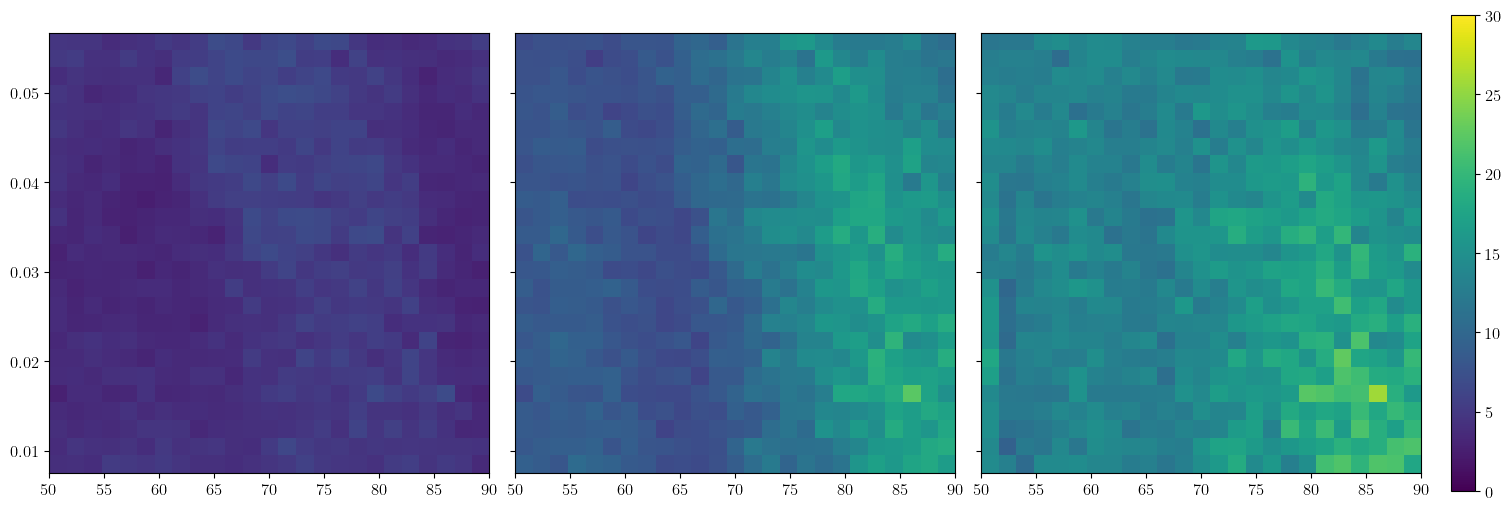

In [40]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True, layout = 'constrained')

vmin, vmax = 0,30

im0 = ax[0].imshow(wass_dist_multi_data_theta[:,:,:30].sum(2), cmap='viridis', vmin=vmin, vmax=vmax,extent=[theta_x_min, theta_x_max, theta_y_min, theta_y_max])

ax[1].imshow(wass_dist_multi_data_theta[:,:,30:60].sum(2), cmap='viridis', vmin=vmin, vmax=vmax,extent=[theta_x_min, theta_x_max, theta_y_min, theta_y_max])

ax[2].imshow(wass_dist_multi_data_theta[:,:,60:].sum(2), cmap='viridis', vmin=vmin, vmax=vmax,extent=[theta_x_min, theta_x_max, theta_y_min, theta_y_max])

#ax[0].set_xlim(theta_x_min, theta_x_max)
#ax[0].set_ylim(theta_y_min, theta_y_max)

## Rescale the image so that they are squares
for i in range(3):
    ax[i].set_aspect((theta_x_max-theta_x_min)/(theta_y_max-theta_y_min))

plt.colorbar(im0, ax=ax[2])

if save_fig:
    plt.savefig('figs/wass_dist_multi_data_theta.pdf', bbox_inches='tight')